## Autoencoder Assignment



In [2]:
import numpy as np
import pandas as pd

### Load and normalize our data

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


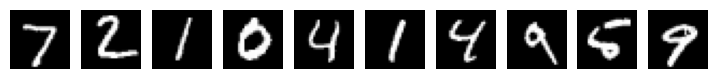

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [5]:
performance = pd.DataFrame({"model":[], "MSE-loss":[]})

### Create an autoencoder model.

In [22]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 100 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               392500    
                                                                 
 dense_17 (Dense)            (None, 300)               150300    
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 300)               30300     
                                                                 
 dense_22 (Dense)            (None, 500)              

### Train the autoencoder model.

In [23]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 19s 36ms/step - loss: 0.1758 - val_loss: 0.1220
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1105 - val_loss: 0.1002
Epoch 3/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0974 - val_loss: 0.0926
Epoch 4/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0916 - val_loss: 0.0893
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0881 - val_loss: 0.0864
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0857 - val_loss: 0.0841
Epoch 7/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0839 - val_loss: 0.0830
Epoch 8/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0826 - val_loss: 0.0828
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0814 - val_loss: 0.0809
Epoch 10/10
469/469 [==============================] - 19s 41ms/step - loss: 0.080

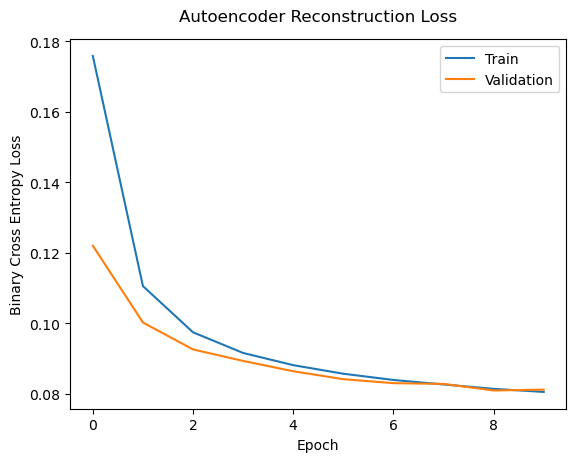

In [24]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [25]:
reconstructed_images = autoencoder.predict(test_images)

313/313 [==============================] - 2s 5ms/step


### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

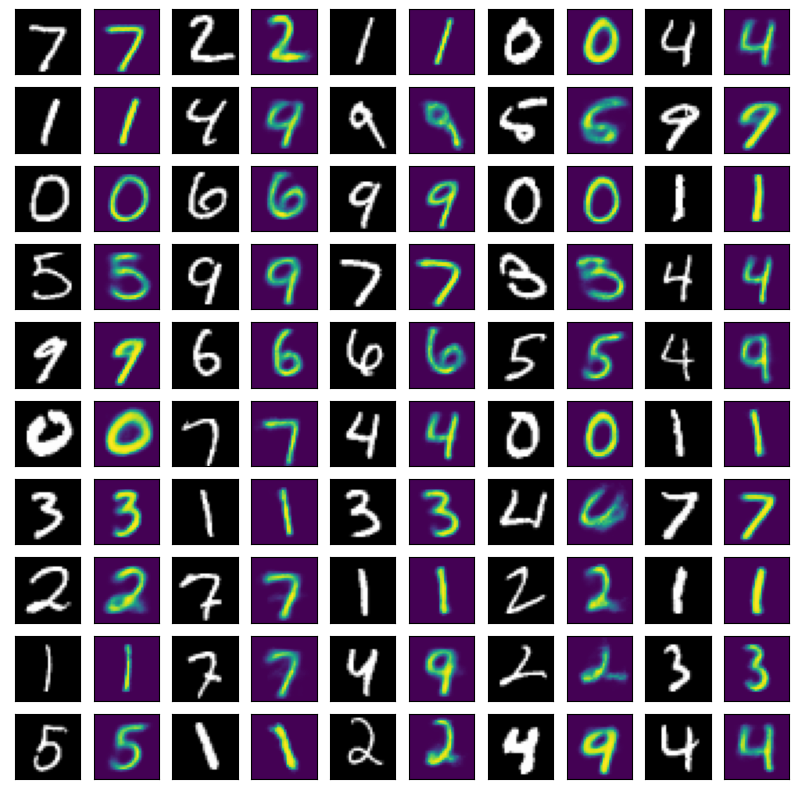

In [12]:
#6N

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

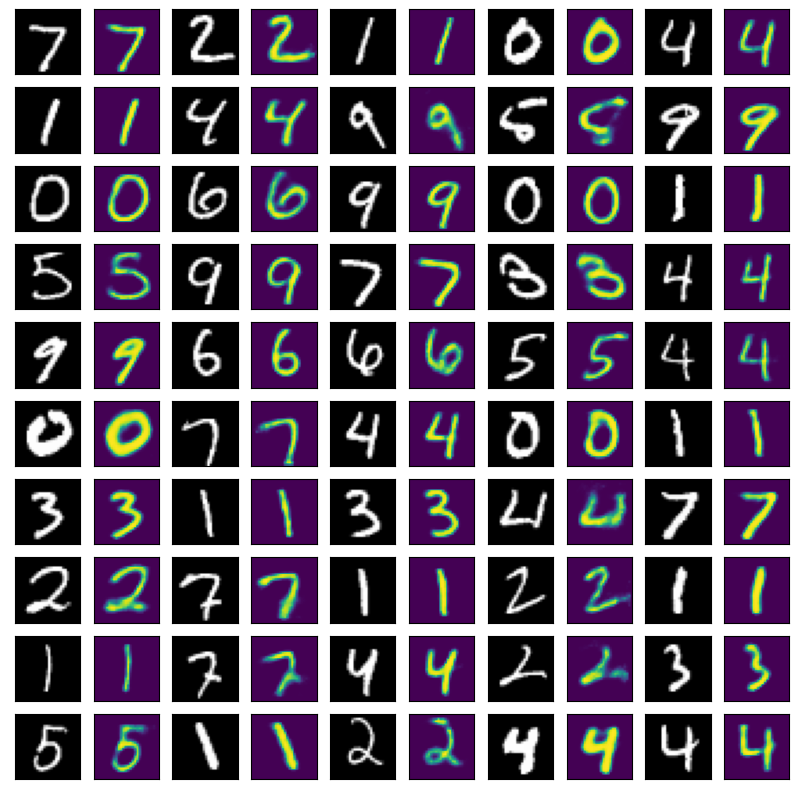

In [19]:
#16N

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

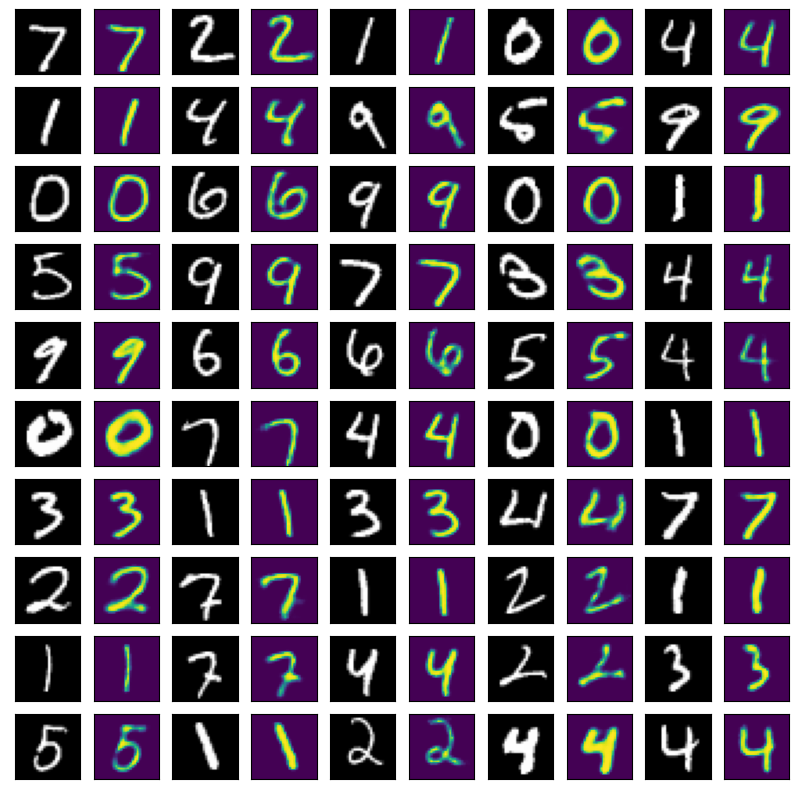

In [26]:
#100N

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [27]:
mse = autoencoder.evaluate(test_images, test_images)

313/313 [==============================] - 2s 7ms/step - loss: 0.0812


In [28]:
performance= pd.concat([performance, pd.DataFrame({'model':'100N','MSE-loss':mse},index=[0])])
performance

,model,MSE-loss
0,6N,0.132554
0,16N,0.091511
0,100N,0.081159


As per the above results we can clearly say that the MSE Loss percentage is less for the bottle neck of  100 Neurons. So 100N is the better performing model as  it has more capacity to encode and decode information.